In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
def loadImage(image):
  img = cv2.imread(image,0)
  #cv2_imshow(img)
  #print(type(img))
  return img

In [0]:
def createKernel():
  print('Enter space-separated matrix size:(Like \'3 3\' for (3*3) matrix )')
  kerX,kerY= map(int,input().split())
  print('\nEnter space-separated Matrix elements for kernel:(like \'-1 -1 -1 -1 4 -1 -1 -1 -1\' for edge detection )')
  data = list(map(float,input().split()))
  mat = np.array(data).reshape(kerX, kerY) 
  print('Kernel input:\n {}'.format(mat))
  return kerX,kerY,mat


In [0]:
def padding(arr,top,bottom,left,right):
  xlen = arr.shape[0]+2*left
  ylen = arr.shape[1]+2*top
  new = np.zeros([xlen,ylen],dtype=int)
  #print(new.shape)
  new[left:arr.shape[0]+left,top:arr.shape[1]+top] = arr
  new1 = np.array(new)
  #print(new1.shape)
  #print(type(new1))
  return new1


In [0]:
def convolve():
  arr = loadImage('image_1.jpg')
  kerX,kerY,kernel = createKernel()
  top = bottom = (kernel.shape[1] // 2)
  left = right = (kernel.shape[1] // 2)
  newImg = padding(arr,top,bottom,left,right)
  result = np.zeros_like(arr)
  #print(result.shape)
  for x in range(arr.shape[1]):
    for y in range(arr.shape[0]):
      #print('x={ } and y={ }'.format(x,y))
      result[y, x]=(kernel * newImg[y: y+kernel.shape[0], x: x+kernel.shape[1]]).sum()
  
  plt.title('Original Image')
  plt.imshow(arr, cmap='gray')
  plt.show()
  print('size:{}'.format(arr.shape))
  
  plt.title('Zero Padded Image')
  plt.imshow(newImg, cmap='gray')
  plt.show()
  print('size:{}'.format(newImg.shape))

  plt.title('Convolved Image')
  plt.imshow(result, cmap='gray')    
  plt.show()
  print('size:{}'.format(result.shape))

Enter space-separated matrix size:(Like '3 3' for (3*3) matrix )
3 3

Enter space-separated Matrix elements for kernel:(like '-1 -1 -1 -1 4 -1 -1 -1 -1' for edge detection )
-1 -1 -1 -1 4 -1 -1 -1 -1
Kernel input:
 [[-1. -1. -1.]
 [-1.  4. -1.]
 [-1. -1. -1.]]


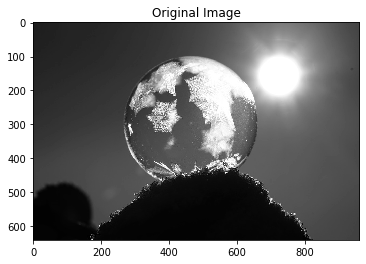

size:(640, 960)


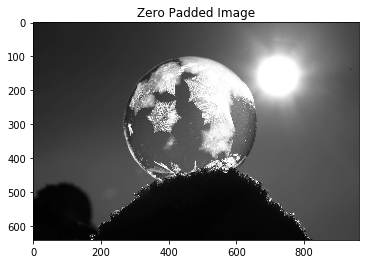

size:(642, 962)


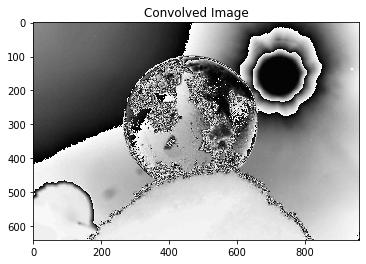

size:(640, 960)


In [18]:
convolve()